<a href="https://colab.research.google.com/github/JohnnyAliyev/JohnnyAliyev-github.io/blob/main/23_Applying_Ridge_and_Lasso_Regression_for_Regularization_of_Linear_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#284b50; overflow:hidden"><b> Applying Ridge and Lasso Regression for Regularized Linear Models </b></div>



# Project Overview

#####  In this project, we apply **Ridge** and **Lasso Regression** to regularize linear models. Ridge Regression shrinks coefficients to manage model complexity, while Lasso Regression simplifies models by zeroing out less important features. These techniques enhance model accuracy and interpretability, making our predictions more reliable.


#

# *1.Import Libraries*


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#

# *2.Import Dataset*

In [ ]:
house_df = pd.read_csv('Ridge and Lasso Regression/kc_house_data.csv', encoding = 'ISO-8859-1')

In [ ]:
house_df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
house_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

#

# *3.Visualization*

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022784036DD8>,
      dtype=object)

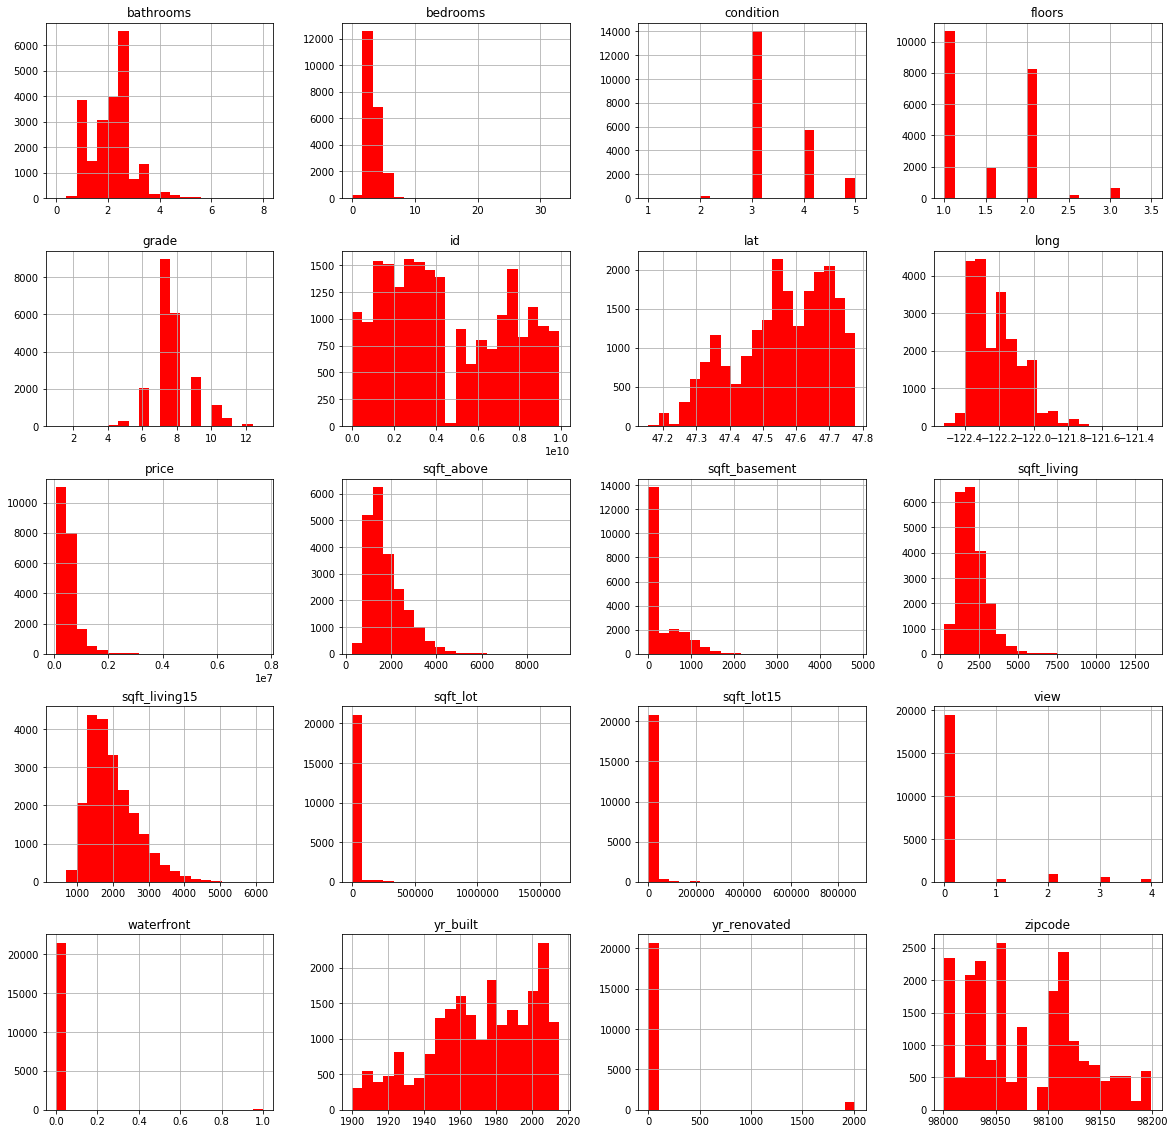

In [ ]:
house_df.hist(bins=20,figsize=(20,20), color = 'r')

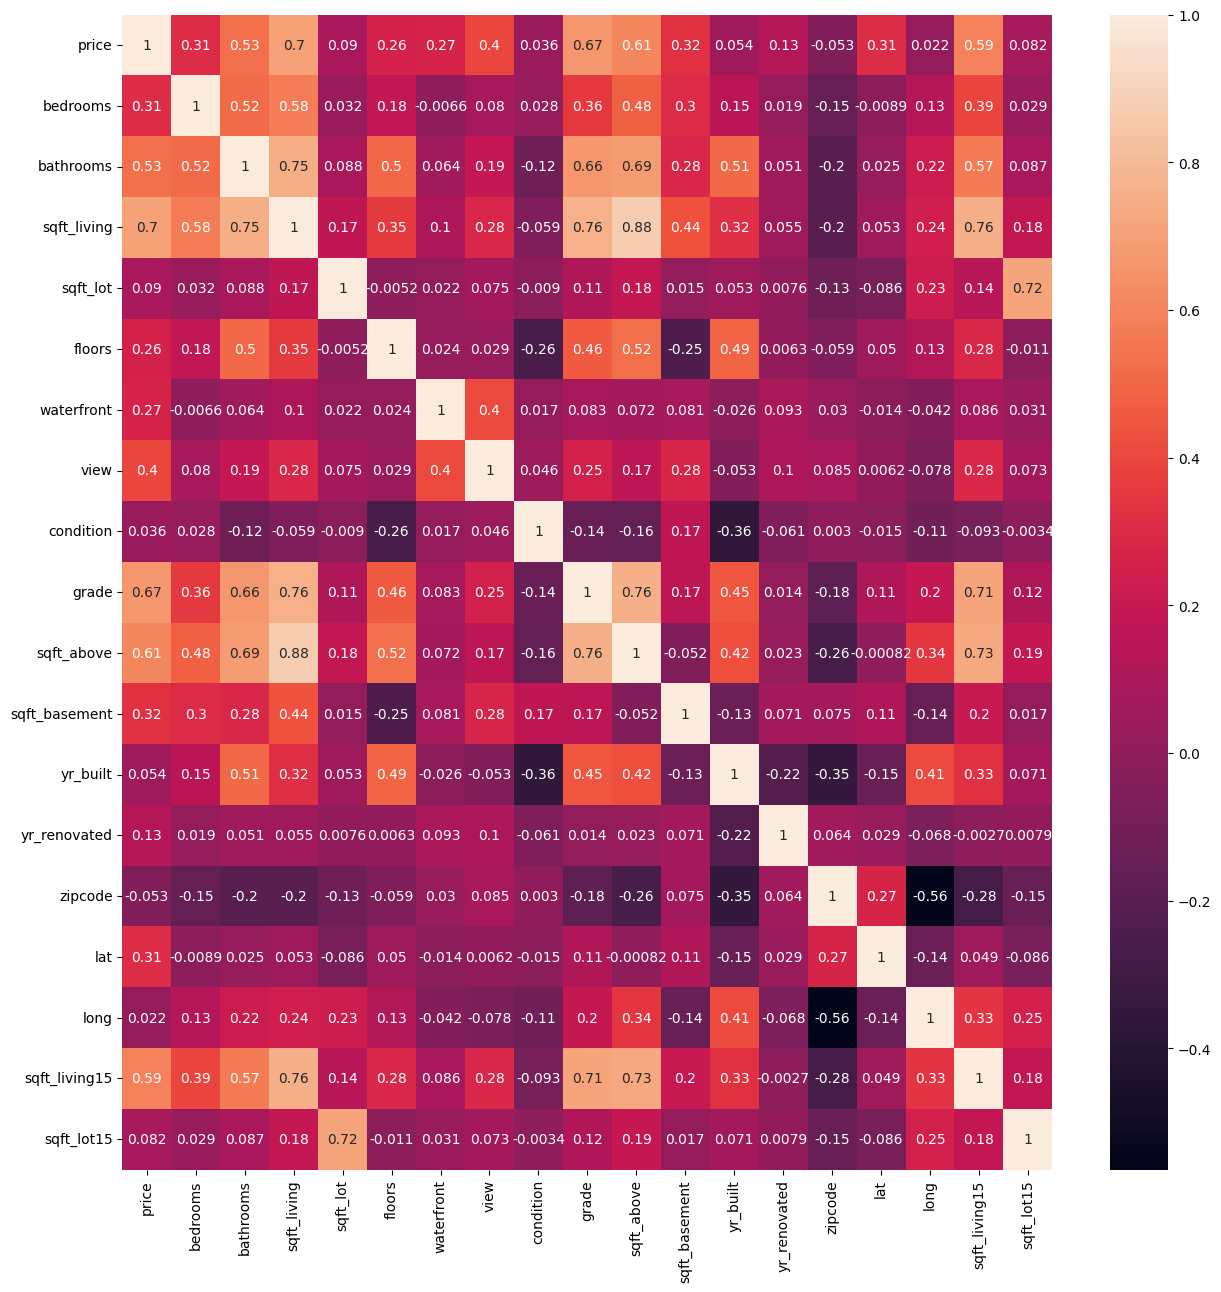

In [ ]:
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(house_df.drop(['date', 'id'], axis=1).corr(), annot=True, ax=ax)

plt.show()

#

# *4.Create Train and Test dataset*

In [ ]:
selected_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors', 'sqft_above', 'sqft_basement', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'yr_built',
'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

X = house_df[selected_features]

In [ ]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,1180,0,0,0,3,7,1180,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,2170,400,0,0,3,7,2170,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,770,0,0,0,3,6,770,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,1050,910,0,0,5,7,1050,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,1680,0,0,0,3,8,1680,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,1530,0,0,0,3,8,1530,2009,0,98103,47.6993,-122.346,1530,1509
21609,4,2.50,2310,5813,2.0,2310,0,0,0,3,8,2310,2014,0,98146,47.5107,-122.362,1830,7200
21610,2,0.75,1020,1350,2.0,1020,0,0,0,3,7,1020,2009,0,98144,47.5944,-122.299,1020,2007
21611,3,2.50,1600,2388,2.0,1600,0,0,0,3,8,1600,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
y = house_df['price']

In [ ]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [ ]:
X.shape

(21613, 19)

In [ ]:
y.shape

(21613,)

#

# *5.Model Training*

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept =True)
regressor.fit(X_train,y_train)
print('Linear Model Coefficient (m): ', regressor.coef_)
print('Linear Model Coefficient (b): ', regressor.intercept_)

Linear Model Coefficient (m):  [-3.14669119e+04  4.19265320e+04  8.57279387e+01  1.01180102e-01
  9.15922238e+03  3.79896043e+01  4.77383343e+01  5.44853375e+05
  5.36487796e+04  2.71037919e+04  9.99071221e+04  3.79896043e+01
 -2.61978544e+03  1.55384012e+01 -5.54749528e+02  5.90767625e+05
 -2.03887788e+05  2.82817937e+01 -3.30885622e-01]
Linear Model Coefficient (b):  5843178.660069611


#

# *6.Model Evaluation*

In [ ]:
y_predict = regressor.predict( X_test)
y_predict

array([446983.08197383, 498544.4007009 , 172362.25112517, ...,
       174298.55799216, 246025.91554673, 564484.17798172])

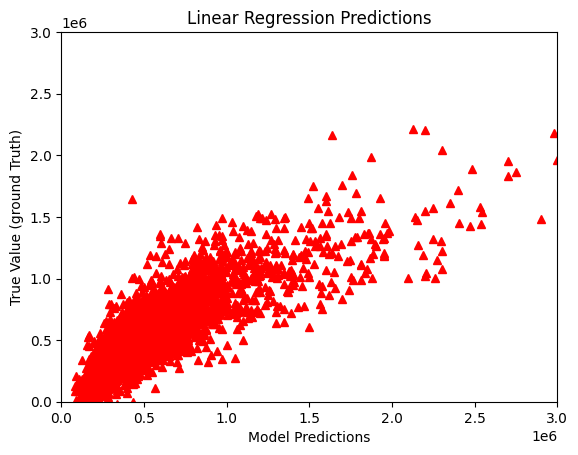

In [ ]:
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlim(0, 3000000)
plt.ylim(0, 3000000)

plt.xlabel("Model Predictions")
plt.ylabel("True Value (ground Truth)")
plt.title('Linear Regression Predictions')
plt.show()

In [ ]:
k = X_test.shape[1]
n = len(X_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)


RMSE = 232853.007 
MSE = 54220523059.400764 
MAE = 130232.73813921501 
R2 = 0.6813599990478115 
Adjusted R2 = 0.6799530364593636


# RIDGE REGRESSION

In [ ]:
from sklearn.linear_model import Lasso, Ridge
regressor_ridge = Ridge(alpha = 50)
regressor_ridge.fit(X_train, y_train)
print('Linear Model Coefficient (m): ', regressor_ridge.coef_)
print('Linear Model Coefficient (b): ', regressor_ridge.intercept_)

y_predict = regressor_ridge.predict( X_test)
y_predict

Linear Model Coefficient (m):  [-3.26113212e+04  4.24733923e+04  8.66123432e+01  7.56150580e-02
  1.28480609e+04  3.66562335e+01  4.99561023e+01  3.70267870e+05
  6.03057871e+04  2.60863833e+04  1.02725914e+05  3.66562435e+01
 -2.77190518e+03  1.60508807e+01 -4.54627253e+02  4.99438766e+05
 -1.58024792e+05  2.75575027e+01 -3.57522130e-01]
Linear Model Coefficient (b):  6255167.196086997


array([458710.14067944, 517504.79582692, 192257.79312527, ...,
       189145.89726944, 263119.76025973, 571129.10069308])

# LASSO REGRESSION

In [ ]:
from sklearn.linear_model import Lasso
regressor_lasso = Lasso(alpha = 500)
regressor_lasso.fit(X_train,y_train)
print('Linear Model Coefficient (m): ', regressor_lasso.coef_)
print('Linear Model Coefficient (b): ', regressor_lasso.intercept_)

y_predict = regressor_lasso.predict( X_test)
y_predict

Linear Model Coefficient (m):  [-3.09256255e+04  4.04907645e+04  2.49627344e+02  8.41115565e-02
  8.66749439e+03  3.14395318e+01 -1.13783335e+02  4.67778097e+05
  5.63558407e+04  2.53944326e+04  1.01208368e+05 -1.19297819e+02
 -2.68549666e+03  1.60631073e+01 -4.85201197e+02  5.58531543e+05
 -1.59367347e+05  2.68379320e+01 -3.54544166e-01]
Linear Model Coefficient (b):  6126033.323319759


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.050e+14, tolerance: 2.177e+11
  model = cd_fast.enet_coordinate_descent(


array([446423.80390562, 508577.2844993 , 179171.75693311, ...,
       184415.40463273, 254745.58648693, 567557.87042391])

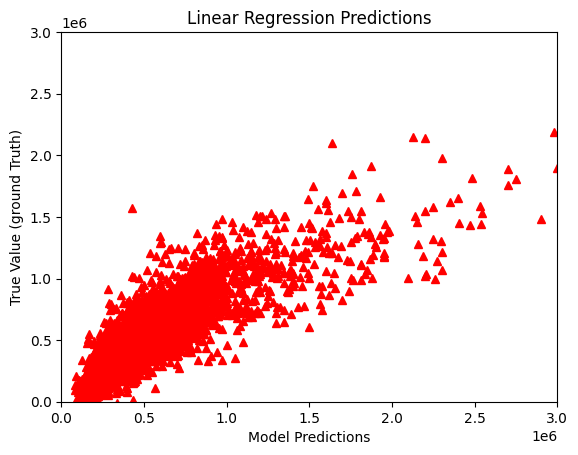

In [ ]:

plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlim(0, 3000000)
plt.ylim(0, 3000000)

plt.xlabel("Model Predictions")
plt.ylabel("True Value (ground Truth)")
plt.title('Linear Regression Predictions')
plt.show()

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)


RMSE = 233643.987 
MSE = 54589512653.81962 
MAE = 130084.1394722829 
R2 = 0.6791915425652327 
Adjusted R2 = 0.6777750051050281
